In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd

In [2]:
# Load the data
file_path = Path("Resources/FW_Veg_Rem_Combined.csv")
df_dataset1 = pd.read_csv(file_path)
df_dataset1 = df_dataset1[["fire_size","fire_size_class","Vegetation","Temp_pre_30","Wind_pre_30","Hum_pre_30","Prec_pre_30","remoteness"]].copy()
df_dataset1 = df_dataset1.dropna()
df_dataset1.head()

,fire_size,fire_size_class,Vegetation,Temp_pre_30,Wind_pre_30,Hum_pre_30,Prec_pre_30,remoteness
0,10.0,C,12,24.480974,4.341807,78.216590,0.0,0.017923
1,3.0,B,15,7.553433,2.709764,70.840000,59.8,0.184355
2,60.0,C,16,4.971930,3.364499,75.531629,168.8,0.194544
3,1.0,B,0,16.275967,4.054982,44.778429,10.4,0.487447
4,2.0,B,12,-1.000000,-1.000000,-1.000000,-1.0,0.214633


In [3]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X = df_dataset1["Wind_pre_30"].values.reshape(-1, 1)
y = df_dataset1["fire_size"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (55367, 1) (55367, 1)


Text(0, 0.5, 'fire_size')

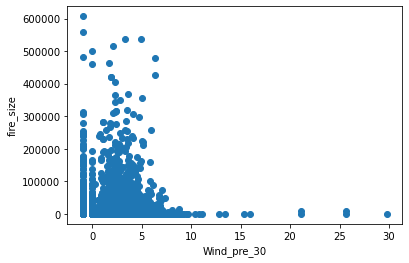

In [4]:
# Plot the data to find out if a linear trend exists

plt.scatter(X, y)
plt.xlabel("Wind_pre_30")
plt.ylabel("fire_size")

In [5]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [6]:
# Create the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [7]:
# Fit the model to the training data. 

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.00018347189043077528
Testing Score: 4.1054874515555895e-06


In [8]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# A good MSE score will be close to zero, while a good R2 score will be close to 1.
# R2 score is the default scoring for many of the Sklearn models


mean squared error (MSE): 252865890.8980778
R-squared (R2): 4.1054874515555895e-06


In [9]:
# Call the `score()` method on the model to show the R2 score

model.score(X_test, y_test)

4.1054874515555895e-06